# Scientific Python coding practices

*Authors: Pierre Ablin & Mathurin Massias*

Email : first.last@inria.fr



## 1) NumPy

Python is widely used in science because of its flexibility and because it comes with a lot of handful libraries. Arguably, the most important one is  **NumPy**. It allows for efficient manipulation of **arrays** (i.e. tables of numbers), and implements many useful operations. They include very basic operations (sum, mean, multiplication, max...), linear algebra (dot product, SVD, LU decompostion, eigen value computation...), signal processing tools (FFT), and random number generation. 

The following is a simple illustration of the computational advantage of using NumPy arrays rather than native Python code. The magic function `%timeit` is used to time code snippets. Say that we want to compute the sum of all integers between 0 and 10000. In pure python, one would construct the *list* of such integers, `range(10000)`, and then use the `sum` function.

In [1]:
n = 10 ** 4

In [2]:
%timeit sum(range(n))

143 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The command `import numpy as np` imports the numpy library. **You should always import Numpy as np, never use another name**. Then, `np.arange(10000)` creates an *array* of integers, and the function `np.sum` computes the sum.  

In [3]:
import numpy as np

In [4]:
%timeit np.sum(np.arange(n))

16.7 µs ± 88.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


On this example, the gain is of ~10. You can try with higher values than 10000, the results should be even more striking.

## 2) Vectorize code
NumPy is very good to perform *vectorized* tasks. As a rule of thumb, you should always avoid looping over a Numpy array to perform simple operations for two reasons: readability, and computation efficiency. Given an array $x$ of size $N$, the following code computes $\sum_{i=1}^N \log(1 + exp(-x_i))$.

In [5]:
def naive_sum(x):
    N = len(x)
    output = 0.
    for i in range(N):
        output += np.log(1. + np.exp(-x[i]))
    return output

**You should avoid this type of code.** The following produces the exact same results. It is faster and more readable:

In [6]:
def good_sum(x):
    return np.sum(np.log(1. + np.exp(-x)))

In [7]:
x = np.random.randn(1000)

naive_sum(x), good_sum(x)

(803.6240732954611, 803.6240732954609)

## 3) Writing readable code

In order to produce readable code, a few remarks are in order. Code should follow as much as possible the PEP 8 style (https://www.python.org/dev/peps/pep-0008/?#introduction). A nice summary is found here : https://development.robinwinslow.uk/2014/01/05/summary-of-python-code-style-conventions/. You should especially read and apply the "Whitespace and newlines" part for the lab.

- When you assign a new variable, there should be spaces around the "`=`".  **Good** : `a = 1`. **Bad**: `a=1`
- Same when you call a function with several arguments, there should be a space after each comma. **Good** : `f(x, y)`. **Bad** : `f(x,y)`
- You should only use necessary parenthesis. **Good** : `x_new = prox_g(x - grad_f(x) / step, s / step)`. **Bad**: `x_new=prox_g(x-(grad_f(x)*(1/step)),s*(1/step))`
- Do not use semicolons at the end of lines. **Good** : `a = 1`. ** Bad** : `a = 1;`

## 4) Plotting 

Matplotlib is the go-to library for Python plots. Quick reminder about good scientific plots: Every figure should have a name, labeled x and y axis, and a legend where there are more than one curve on the plot.

### Example: 

In [8]:
import matplotlib.pyplot as plt

Same as before, you should always use this alias `plt`.

In [9]:
t = np.linspace(0, 8, 100)
x = np.cos(t)
y = np.exp(-t/2.)

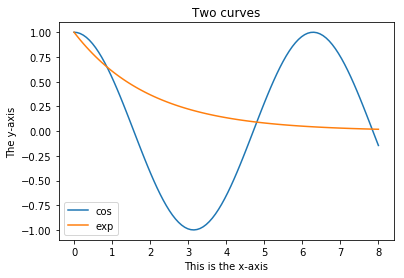

In [10]:
plt.plot(t, x, label='cos')  # The keyword legend says that this line corresponds to 'cos'.
plt.plot(t, y, label='exp')
plt.title('Two curves')
plt.xlabel('This is the x-axis')
plt.ylabel('The y-axis')
plt.legend()  # To actually display the legend
plt.show()

When you want to plot something that goes to 0, *always* use log-scale. You can force both axes to be in log-scale by replacing `plt.plot` by `plt.loglog`. If only one axis is to be displayed in log-scale, the functions `plt.semilogy` and `plt.semilogx` are what you want. It is much much better to do `plt.semilogx(x, y)` than `plt.plot(np.log(x), y)`.

### Example:

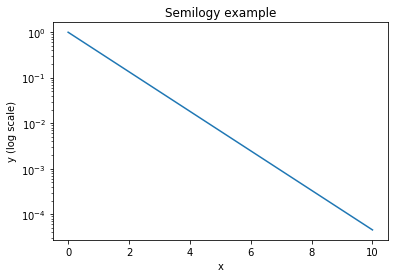

In [11]:
x = np.linspace(0, 10, 100)
y = np.exp(-x)

plt.semilogy(x, y)
plt.title('Semilogy example')
plt.xlabel('x')
plt.ylabel('y (log scale)')
plt.show()

## 5) Avoid code duplication

Loops are powerful tools to make code more compact. Use them.


### Bad example:

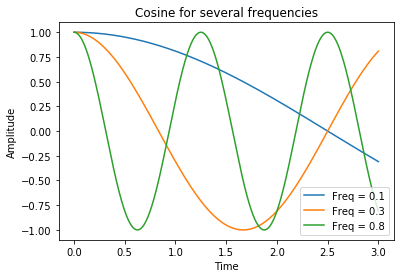

In [12]:
t = np.linspace(0, 3, 1000)

freq = 0.1
x = np.cos(2 * np.pi * t * freq)
plt.plot(t, x, label='Freq = 0.1')

freq = 0.3
x = np.cos(2 * np.pi * t * freq)
plt.plot(t, x, label='Freq = 0.3')

freq = 0.8
x = np.cos(2 * np.pi * t * freq)
plt.plot(t, x, label='Freq = 0.8')

plt.title('Cosine for several frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

The previous code is long, kind of hard to read, and hard to maintain (i.e., if you change the cos to a sine, you have to change it 3 times and might make a mistake).

### Much better:


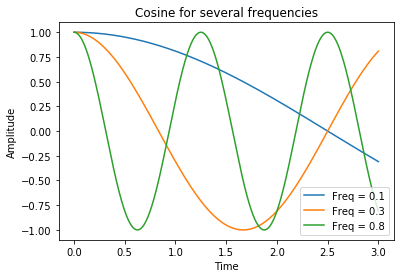

In [13]:
t = np.linspace(0, 3, 1000)

for freq in [0.1, 0.3, 0.8]:
    x = np.cos(2 * np.pi * t * freq)
    plt.plot(t, x, label='Freq = %.1f' % freq)  # Using a bit of string formatting

plt.title('Cosine for several frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

The code is shorter, and if you want to change the cos into a sin, you only have to change it in one spot.

## 6) Regarding the labs

The instructions above should be respected as much as possible. As the course progresses, we will be less and less tolerant with bad coding practices.

Finally, before uploading your notebook, **always restart the kernel and run all the notebook from scratch**. Everything should run properly.